# Exploratory Data Analysis and Network Analysis

In [3]:
import matplotlib.pyplot as plt
from collections import Counter
from joblib import load, dump
from ipywidgets import widgets
import plotly.graph_objects as go
import plotly.express as px
from dash import html, dcc
from dash.dependencies import Input, Output
import seaborn as sns
import pandas as pd
import numpy as np
import networkx
import pyLDAvis
import dash
import string
import time
import os
import re

Dataframes consisting of a document topic distribution with each document being one 1000-word segment of a book and the features about the texts covering the following attributes: 'title', 'author', 'date','gender', 'birthdate', 'nationality', 'source' always being given, as well as the following only filled for about 1/4 of the texts 'period', 'mode', 'genre',  'role (central/peripheral/influence)' and 'polarity', 

In [4]:
df_txt_features_LDA=pd.read_csv('./analysis/df_txt_features_LDA.csv')
df_txt_features_CTM=pd.read_csv('./analysis/df_txt_features_CTM.csv')
df_txt_features_ETM=pd.read_csv('./analysis/df_txt_features_ETM.csv')

In [6]:
top_words_per_topic_LDA = ('./analysis/top_words_per_topic_LDA.joblib')
top_words_per_topic_CTM = ('./analysis/top_words_per_topic_CTM.joblib')
top_words_per_topic_ETM = ('./analysis/top_words_per_topic_ETM.joblib')

In [7]:
topic_term_dists_LDA = load('./analysis/topic_term_dists_LDA.joblib')
doc_topic_dists_LDA = load('./analysis/doc_topic_dists_LDA.joblib')
topic_term_dists_CTM = load('./analysis/topic_term_dists_CTM.joblib')
doc_topic_dists_CTM = load('./analysis/doc_topic_dists_CTM.joblib')
topic_term_dists_ETM = load('./analysis/topic_term_dists_ETM.joblib')
doc_topic_dists_ETM = load('./analysis/doc_topic_dists_ETM.joblib')
vocab = load('./analysis/vocab.joblib')
doc_lengths= load('./analysis/doc_lengths.joblib')
term_frequency = load('./analysis/term_frequency.joblib')

## LDA - alternative

This section has yet to be evaluated. In case there is no benefit to keeping this version as opposed to the slimmer, newly trained new version, the following section will be deleted in favor of a single unified LDA analysis.

In [ ]:
topic_term_dists_LDA_alt = load('./analysis/b_side_prior_removal/topic_term_dists_LDA.joblib')
doc_topic_dists_LDA_alt = load('./analysis/b_side_prior_removal/doc_topic_dists_LDA.joblib')
topic_term_dists_CTM = load('./analysis/b_side_prior_removal/topic_term_dists_CTM.joblib')
vocab_alt = load('./analysis/b_side_prior_removal/vocab.joblib')
doc_lengths_alt= load('./analysisb_side_prior_removal//doc_lengths.joblib')
term_frequency_alt = load('./analysis/b_side_prior_removal/term_frequency.joblib')

In [ ]:
# df_txt_features_LDA_alt=pd.read_csv('./analysis/b_side_prior_removal/df_txt_features_LDA.csv')

# to_remove=[
#  'Armadale',
#  'The Sketch-Book of Geoffrey Crayon',
#  'The Alhambra',
#  'Godolphin',
#  "King Solomon's Mines",
#  'Phantastes',
#  'Hours Of Solitude', 'Ormond; Or, The Secret Witness', 
#  'A Christmas Carol in Prose; Being a Ghost Story of Christmas',
#  'Bleak House',
#  'Great Expectations',
#  'Oliver Twist',
#  'She: A History Of Adventure',
#  'The People of the Mist',
#  'At the Back of the North Wind',
#  'St. George and St. Michael, Volume 1',
#  'The Light Princess',
#  'The Princess and Curdie',
#  'A Legend of Montrose',
#  'Guy Mannering; or, The Astrologer', 
#  'Ivanhoe: A Romance',
#  'Kenilworth',
#  "Letters on Demonology and Witchcraft",
#  'Old Mortality, Complete',
#  'Peveril of the Peak',
#  'Quentin Durward',
#  'Redgauntlet: A Tale of the Eighteenth Century',
#  'Rob Roy — Complete',
#  "St. Ronan's Well",
#  'The Antiquary — Complete',
#  'The Abbot',
#  'The Betrothed',
#  'The Bride of Lammermoor',
#  "The Fair Maid of Perth; Or, St. Valentine's Day",
#  'The Fortunes of Nigel',
#  'The Heart of Mid-Lothian, Complete',
#  'The Monastery',
#  "The Surgeon's Daughter",
#  'The Talisman',
#  "Waverley; Or, 'Tis Sixty Years Since"]

# df_txt_features_LDA = df_txt_features_LDA[~df_txt_features_LDA['title'].isin(to_remove)]


In [4]:
prepared_data = pyLDAvis.prepare(topic_term_dists_LDA_alt, doc_topic_dists_LDA_alt, doc_lengths_alt, vocab_alt, term_frequency_alt)

# Display the visualization
pyLDAvis.display(prepared_data)

#### Feature Distribution

In [3]:
df_feat_alt = df_txt_features_LDA_alt.copy()
df_feat_alt.fillna({'period': 'Unknown', 'mode': 'Unknown', 'genre': 'Unknown', 'role': 'Unknown'}, inplace=True)

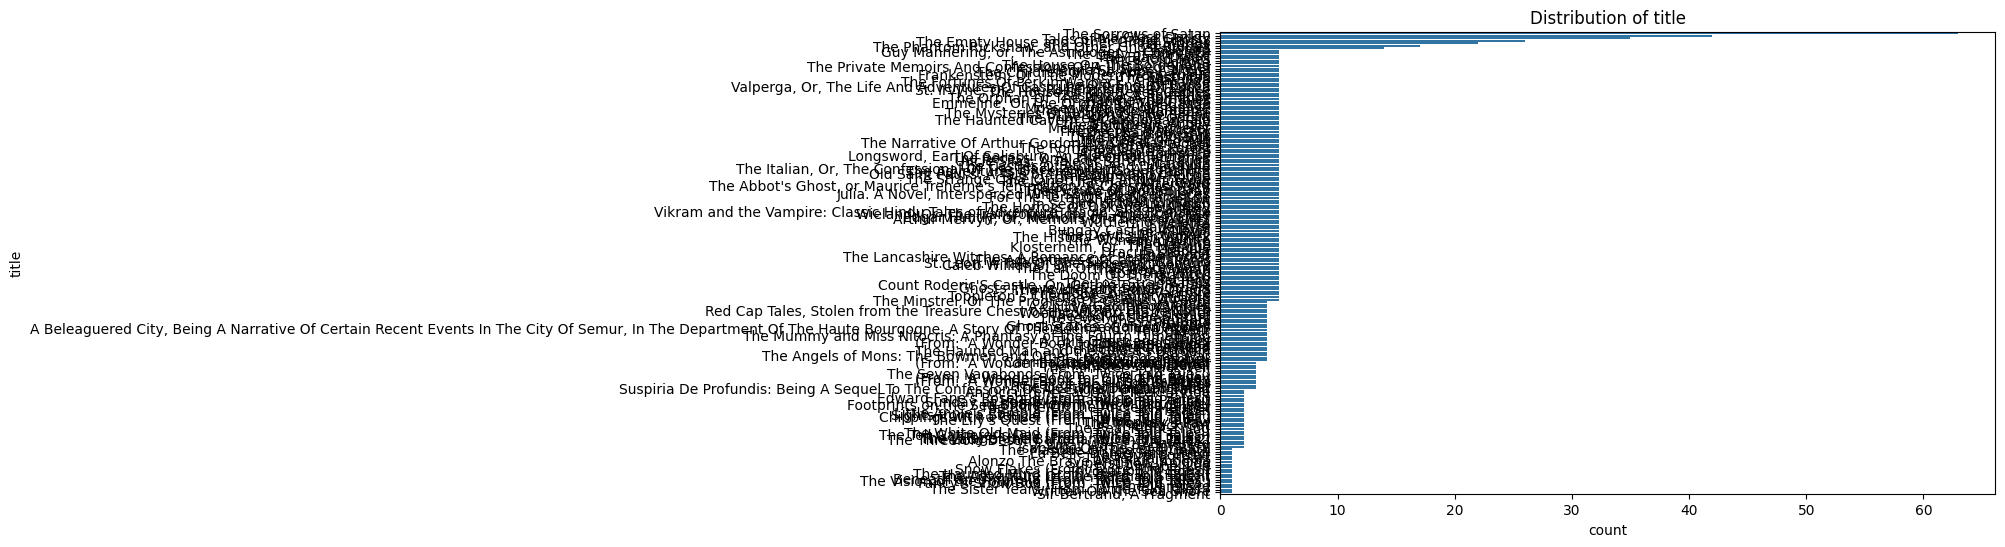

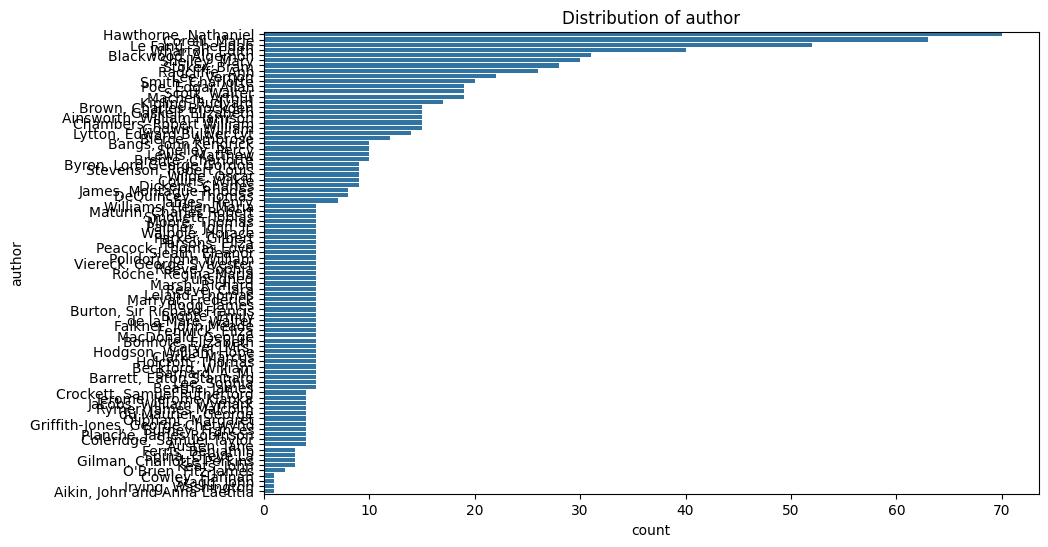

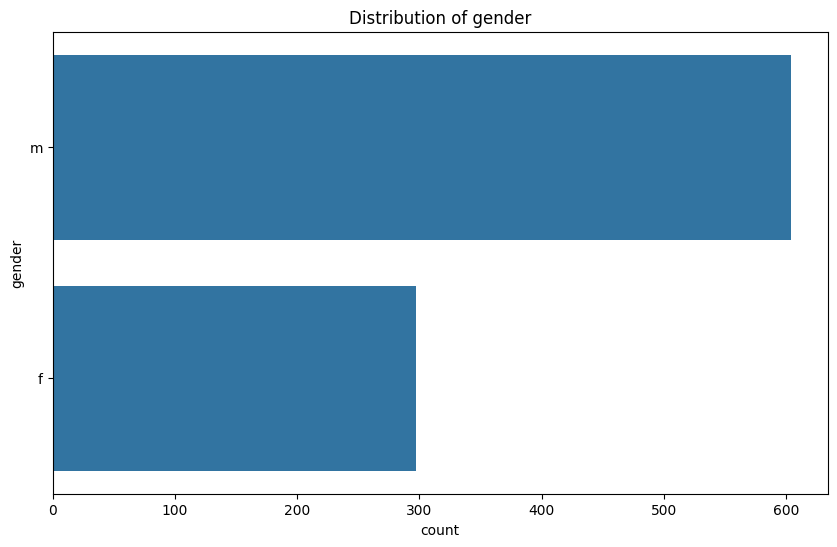

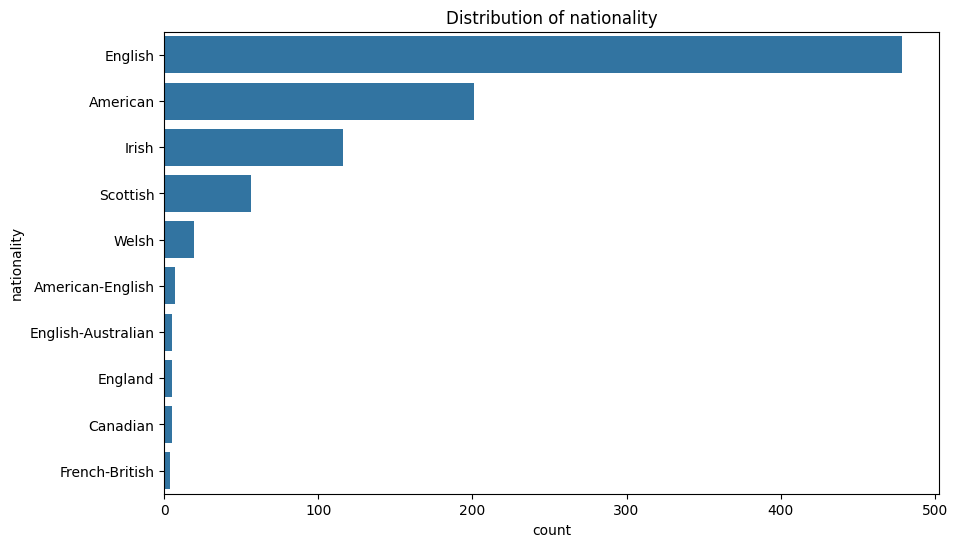

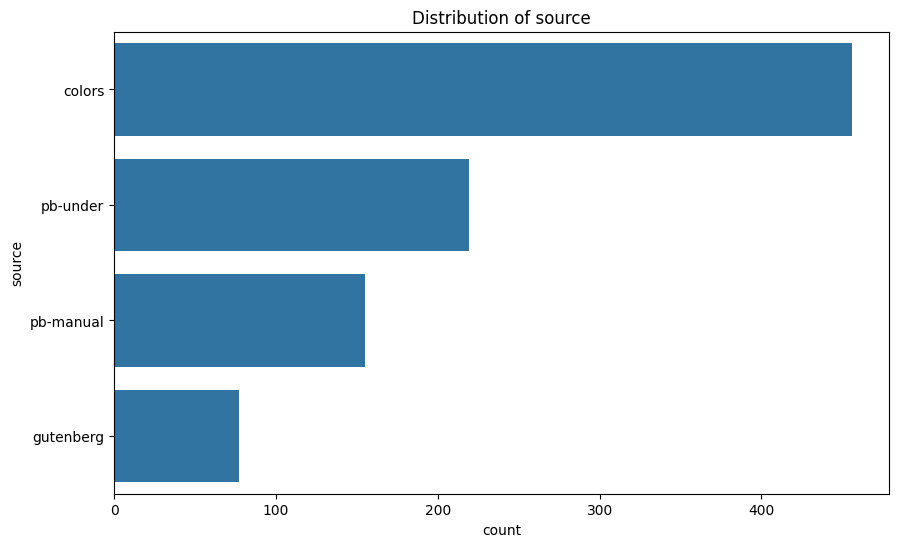

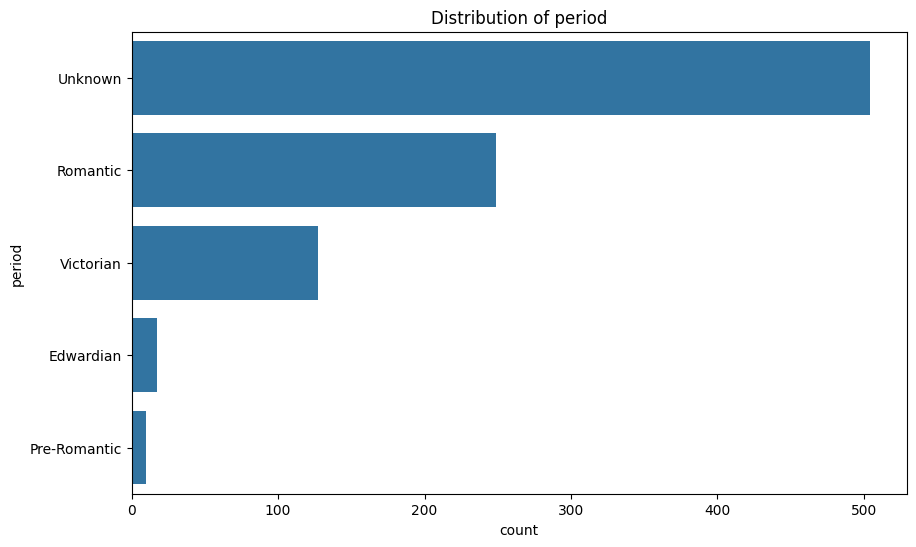

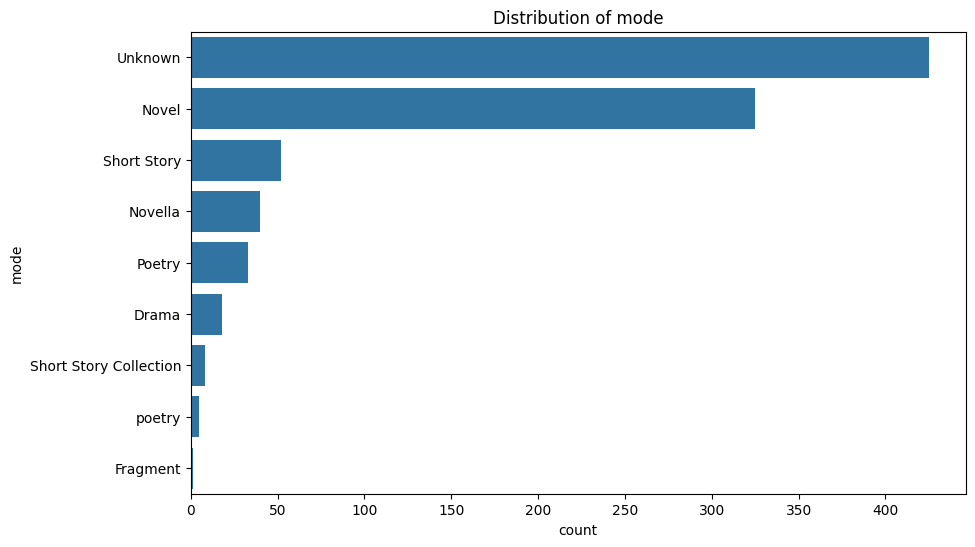

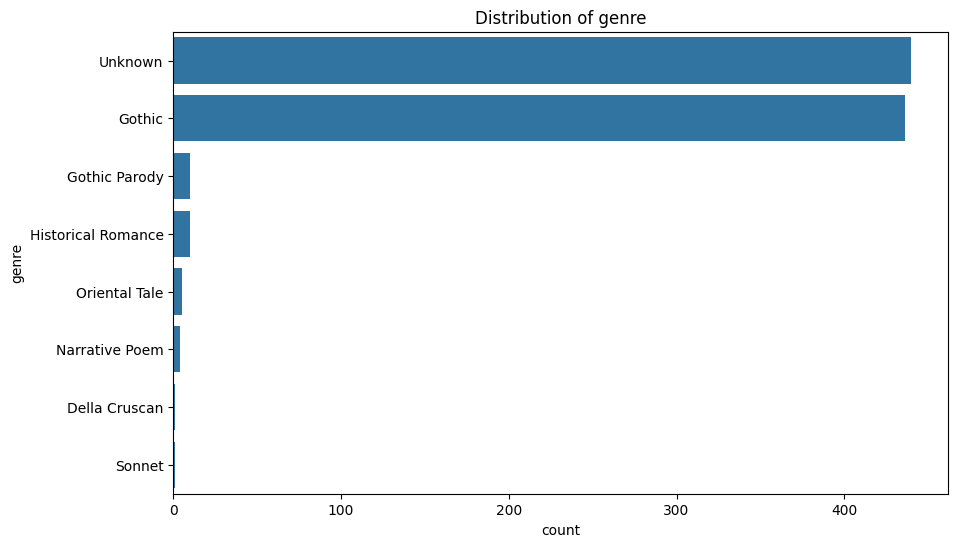

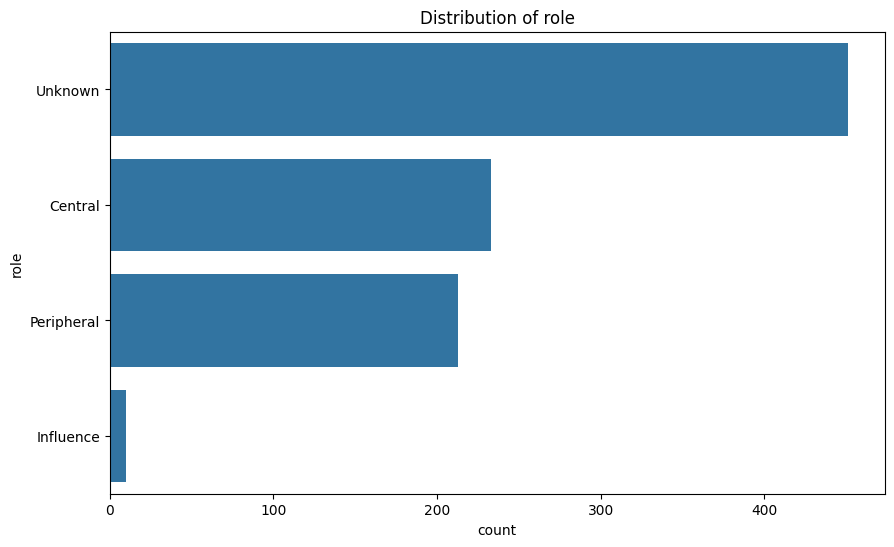

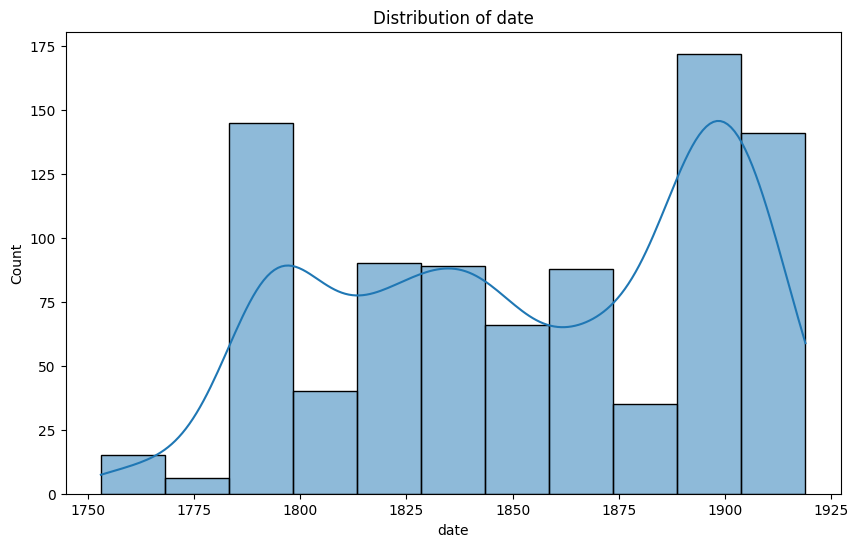

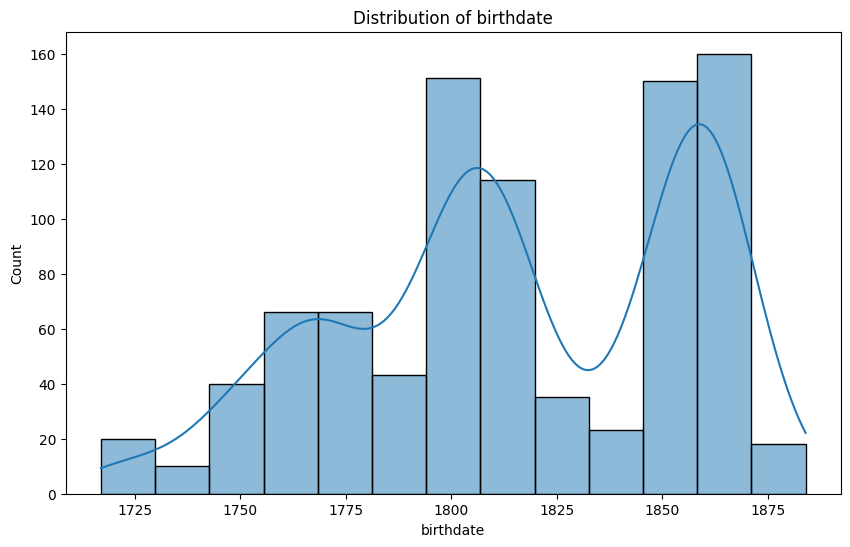

In [4]:
# Categorical features
categorical_features = ['title', 'author', 'gender', 'nationality', 'source', 'period', 'mode', 'genre', 'role']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    # Ordering the categories by frequency
    order = df_feat_alt[feature].value_counts().index
    sns.countplot(y=feature, data=df_feat_alt, order=order)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Numerical features
numerical_features = ['date', 'birthdate']
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_feat_alt[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

We will look more closely at the head ends of title and name to highlight the skew in representation:

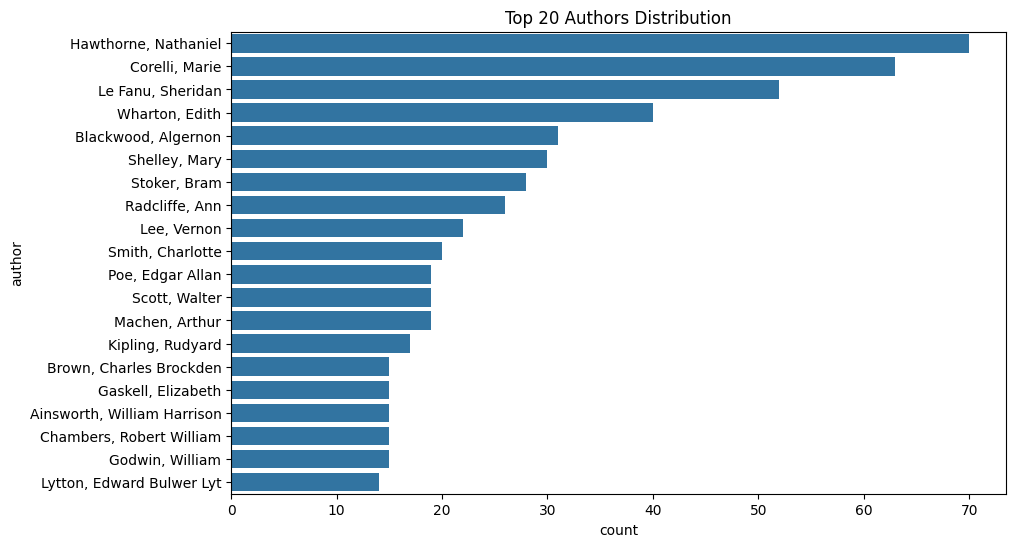

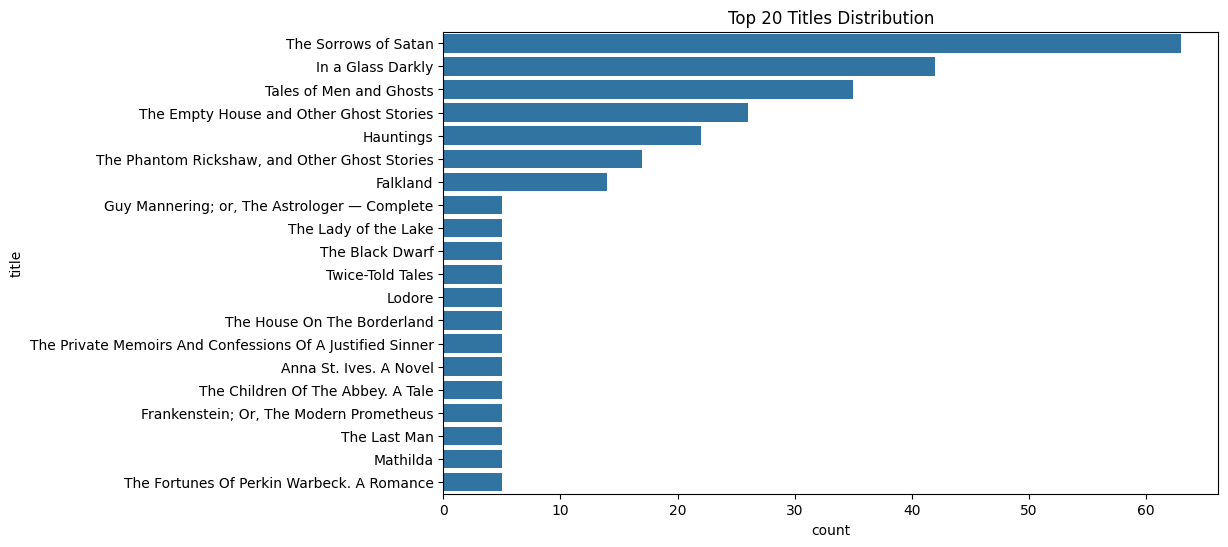

In [5]:
# Adjusting distributions for 'name' and 'title' - focusing on the upper end and bending part of the distribution
# First, find the most common values in 'author' and 'title'
top_authors = df_feat_alt['author'].value_counts().nlargest(20).index
top_titles = df_feat_alt['title'].value_counts().nlargest(20).index

# Plotting distributions for 'author'
plt.figure(figsize=(10, 6))
author_order = df_feat_alt['author'].value_counts().iloc[:20].index
sns.countplot(y='author', data=df_feat_alt, order=author_order)
plt.title('Top 20 Authors Distribution')
plt.show()

# Plotting distributions for 'title'
plt.figure(figsize=(10, 6))
title_order = df_feat_alt['title'].value_counts().iloc[:20].index
sns.countplot(y='title', data=df_feat_alt, order=title_order)
plt.title('Top 20 Titles Distribution')
plt.show()

#### Topic trends over time

In [6]:
df_time_alt = df_txt_features_LDA.copy()

In [7]:
topic_columns = [col for col in df_time_alt.columns if col.startswith('Topic')]

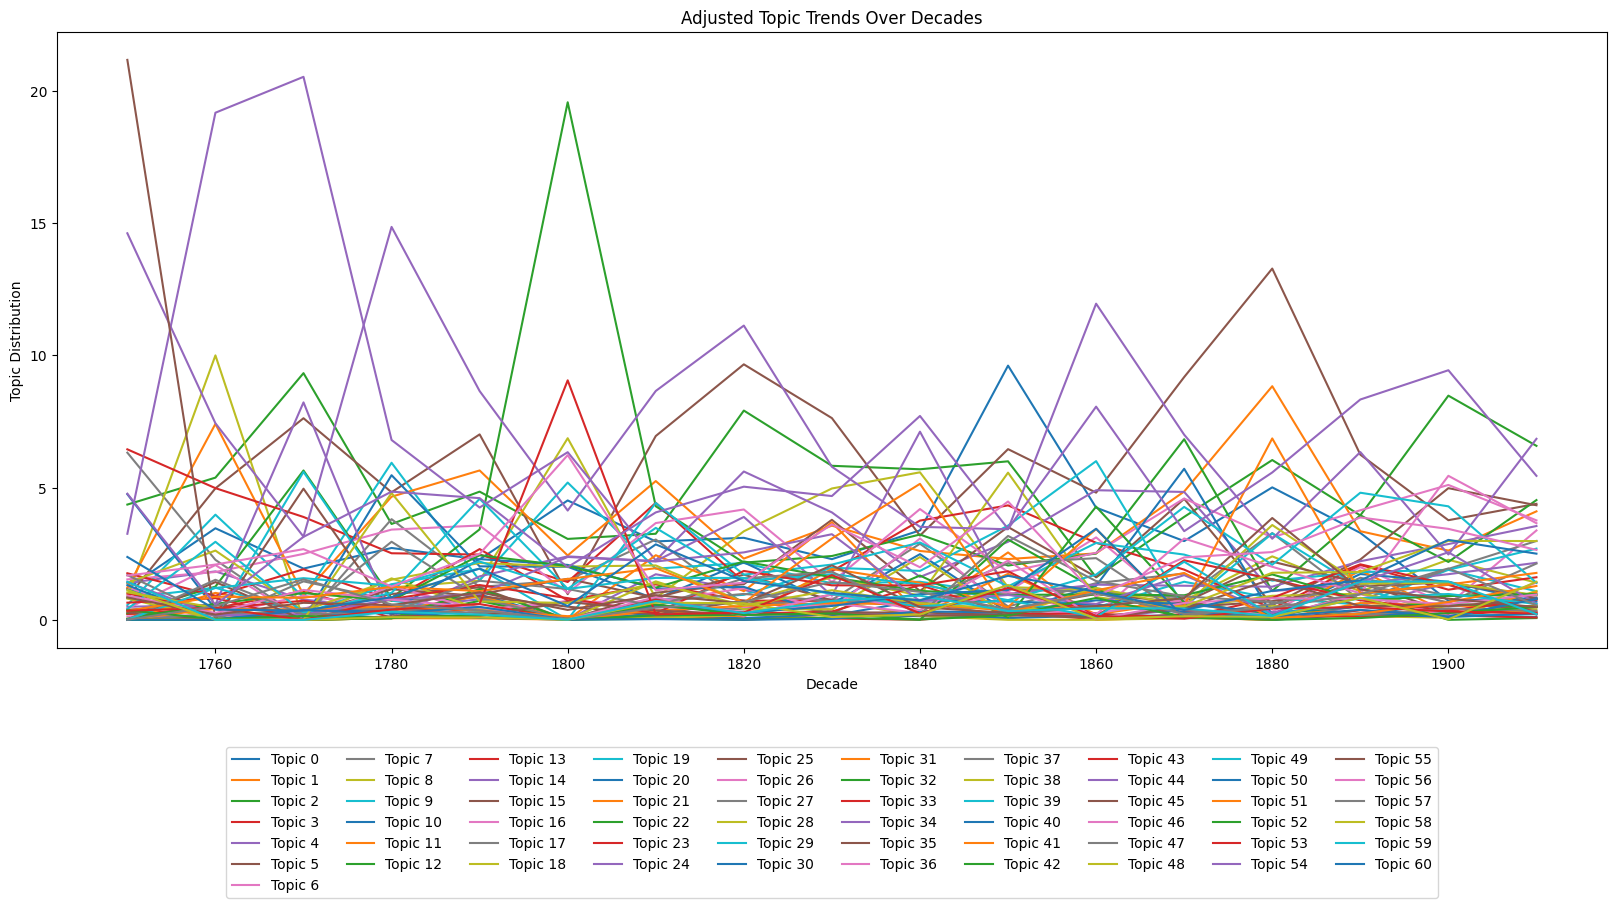

In [8]:

# Function to convert year to decade
def year_to_decade(year):
    return (year // 10) * 10

# Applying the function to create a 'decade' column
df_time_alt['decade'] = df_time_alt['date'].apply(year_to_decade)

# Grouping by 'decade' and calculating the mean for topic distributions
decade_grouped = df_time_alt.groupby('decade')[topic_columns].mean()

plt.figure(figsize=(20, 8))  # Keeping the graph broad
for topic in topic_columns:
    plt.plot(decade_grouped.index, decade_grouped[topic], label=topic)

plt.xlabel('Decade')
plt.ylabel('Topic Distribution')
plt.title('Adjusted Topic Trends Over Decades')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=10)  # Spreading out the legend further with fewer rows
plt.show()

Those topics that surpass a certain threshhold of importance through out their life cycle.
- Filtering for maximal weight through out their lifetime.

In [9]:
# Group 1: Topics that never rise beyond a consistent level
consistent_topics = [topic for topic in topic_columns if decade_grouped[topic].max() <= 8]

# Group 2: Topics that fluctuate
peaking_topics = [topic for topic in topic_columns if decade_grouped[topic].max() > 8]

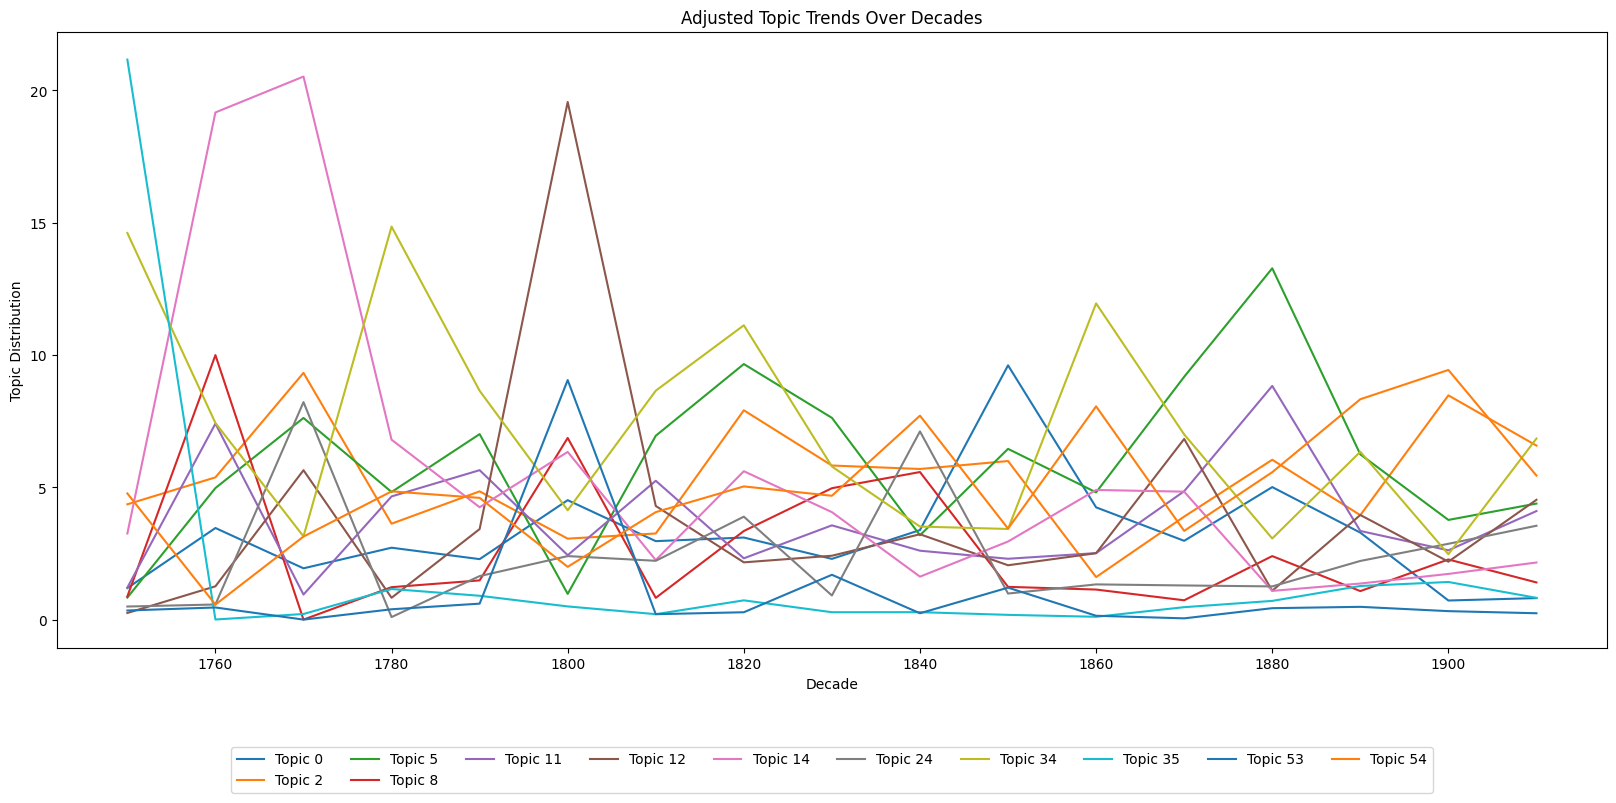

In [10]:
plt.figure(figsize=(20, 8))  # Keeping the graph broad
for topic in peaking_topics:
    plt.plot(decade_grouped.index, decade_grouped[topic], label=topic)

plt.xlabel('Decade')
plt.ylabel('Topic Distribution')
plt.title('Adjusted Topic Trends Over Decades')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=10)  # Spreading out the legend further with fewer rows
plt.show()

Those topics that surpass a certain threshhold of fluctuation and carry a standard deviation higher than the 75th percentile across all topics, indicating that they do not maintain consistent values and vary significantly over the decades.

In [11]:
# Calculating the standard deviation for each topic to measure fluctuations
topic_fluctuations = decade_grouped.std()

# Setting a threshold for identifying strong fluctuations
# This can be adjusted based on the desired level of fluctuation
percentile_threshold = np.percentile(topic_fluctuations, 90)

# Topics with fluctuations above the threshold
fluctuating_topics = topic_fluctuations[topic_fluctuations > percentile_threshold].index.tolist()


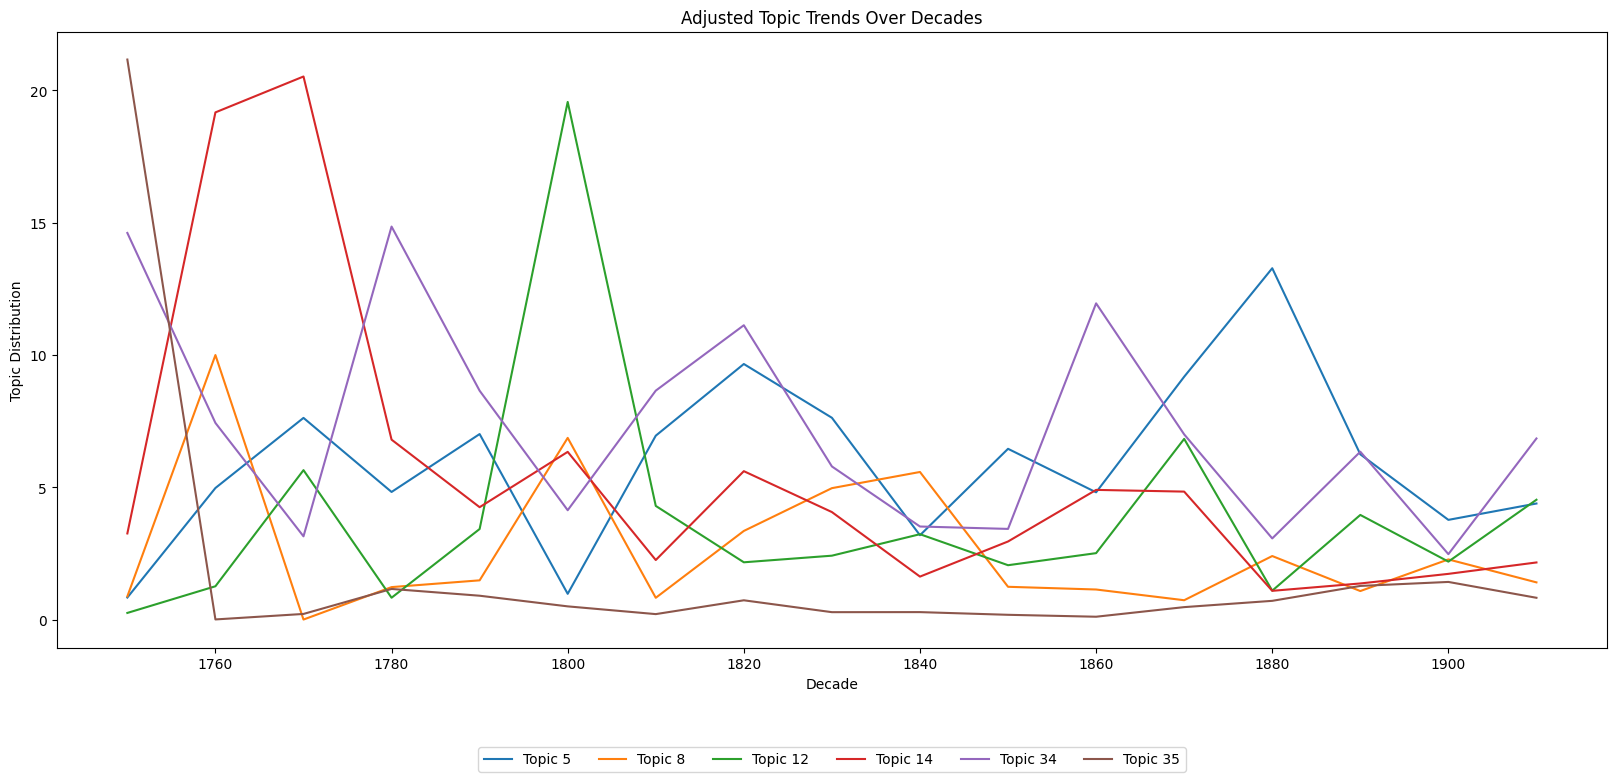

In [12]:
plt.figure(figsize=(20, 8))  # Keeping the graph broad
for topic in fluctuating_topics:
    plt.plot(decade_grouped.index, decade_grouped[topic], label=topic)

plt.xlabel('Decade')
plt.ylabel('Topic Distribution')
plt.title('Adjusted Topic Trends Over Decades')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=10)  # Spreading out the legend further with fewer rows
plt.show()

In [22]:
df = df_txt_features_LDA.copy()

app = dash.Dash(__name__)

# Function to convert year to decade for grouping
def year_to_decade(year):
    return (year // 10) * 10

# Applying the function to create a 'decade' column
df['decade'] = df['date'].apply(year_to_decade)

# Extracting topic columns
topic_columns = [col for col in df.columns if col.startswith('Topic')]

# Grouping by 'decade' and calculating the mean for topic distributions
decade_grouped = df.groupby('decade')[topic_columns].mean()

# Calculating the standard deviation for each topic to measure fluctuations
topic_fluctuations = decade_grouped.std()

# Function to filter topics based on a fluctuation percentile threshold
def filter_topics_by_percentile(threshold_percentile):
    percentile_threshold = np.percentile(topic_fluctuations, threshold_percentile)
    return topic_fluctuations[topic_fluctuations > percentile_threshold].index.tolist()

# Function to update the figure based on selected topics
def create_figure(selected_topics):
    fig = go.Figure()
    for topic in selected_topics:
        fig.add_trace(go.Scatter(x=decade_grouped.index, y=decade_grouped[topic],
                                 mode='lines', name=topic))
    fig.update_layout(legend_orientation="h", legend=dict(x=0, y=1.1, xanchor='left'))
    return fig


# Function to update the figure based on selected topics
def create_figure(selected_topics):
    fig = go.Figure()
    for topic in selected_topics:
        fig.add_trace(go.Scatter(x=decade_grouped.index, y=decade_grouped[topic],
                                 mode='lines', name=topic))
    fig.update_layout(legend_orientation="h", legend=dict(x=0, y=1.1, xanchor='left'))
    return fig

# Create slider
slider = dcc.Slider(
    id='percentile-slider',
    min=0,
    max=100,
    value=90,
    marks={i: f'{i}%' for i in range(0, 101, 25)},
    step=1
)

# Create dropdown (initially empty)
dropdown = dcc.Dropdown(
    id='topic-dropdown',
    options=[],
    value=[],
    multi=True
)

# App layout
app.layout = html.Div([
    html.Div([slider]),
    html.Div([dropdown]),
    dcc.Graph(id='topic-graph')
])


# Callback for updating the dropdown options and selected values based on slider value
@app.callback(
    [Output('topic-dropdown', 'options'),
     Output('topic-dropdown', 'value')],
    [Input('percentile-slider', 'value')]
)
def update_dropdown_options(percentile_value):
    filtered_topics = filter_topics_by_percentile(percentile_value)
    options = [{'label': topic, 'value': topic} for topic in filtered_topics]
    return options, [option['value'] for option in options]

# Callback for updating the graph based on selected topics and percentile
@app.callback(
    Output('topic-graph', 'figure'),
    [Input('topic-dropdown', 'value'),
     Input('percentile-slider', 'value')]
)
def update_graph(selected_topics, percentile_value):
    return create_figure(selected_topics)

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

## LDA - 2

In [29]:
prepared_data = pyLDAvis.prepare(topic_term_dists_LDA, doc_topic_dists_LDA, doc_lengths, vocab, term_frequency)

# Display the visualization
pyLDAvis.display(prepared_data)

In [32]:
df_feat = df_txt_features_LDA.copy()
df_feat.fillna({'period': 'Unknown', 'mode': 'Unknown', 'genre': 'Unknown', 'role': 'Unknown'}, inplace=True)

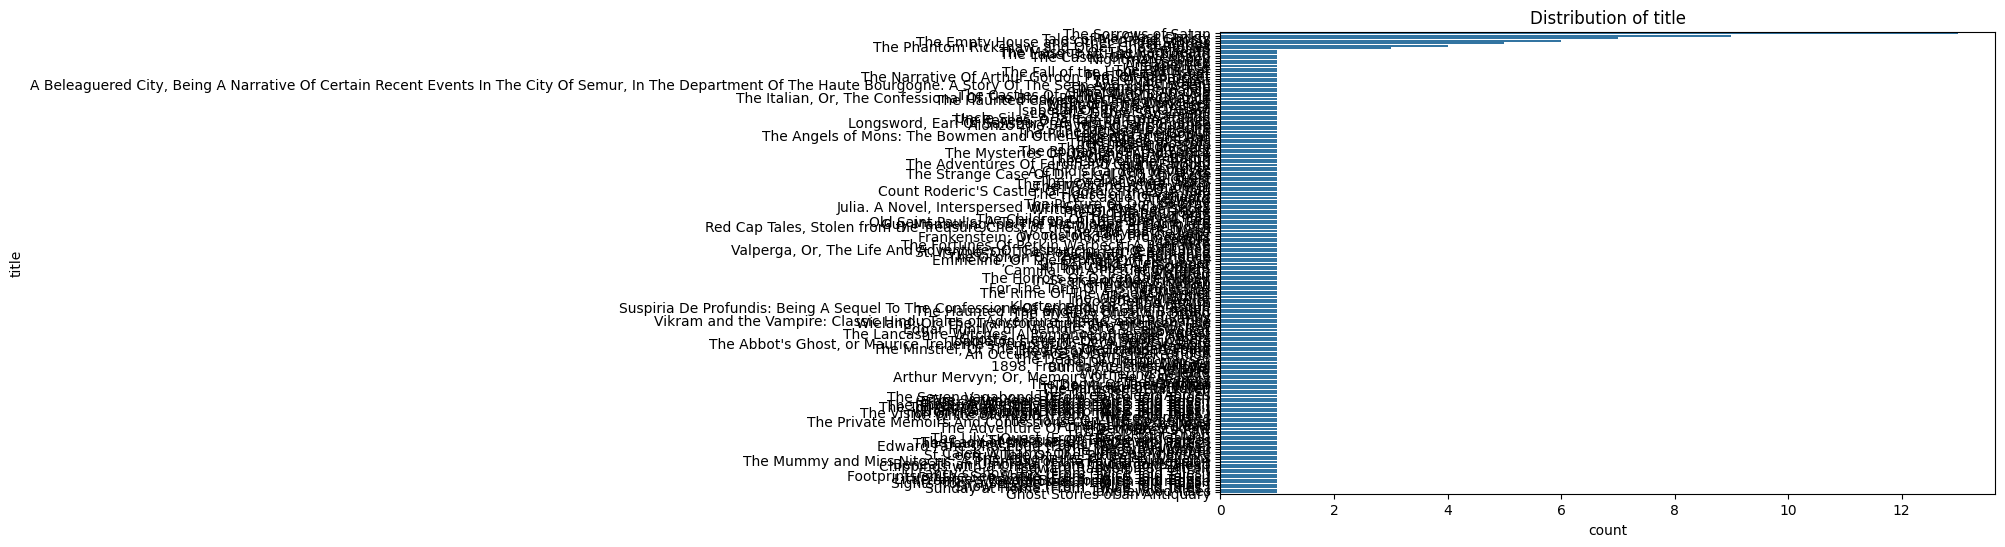

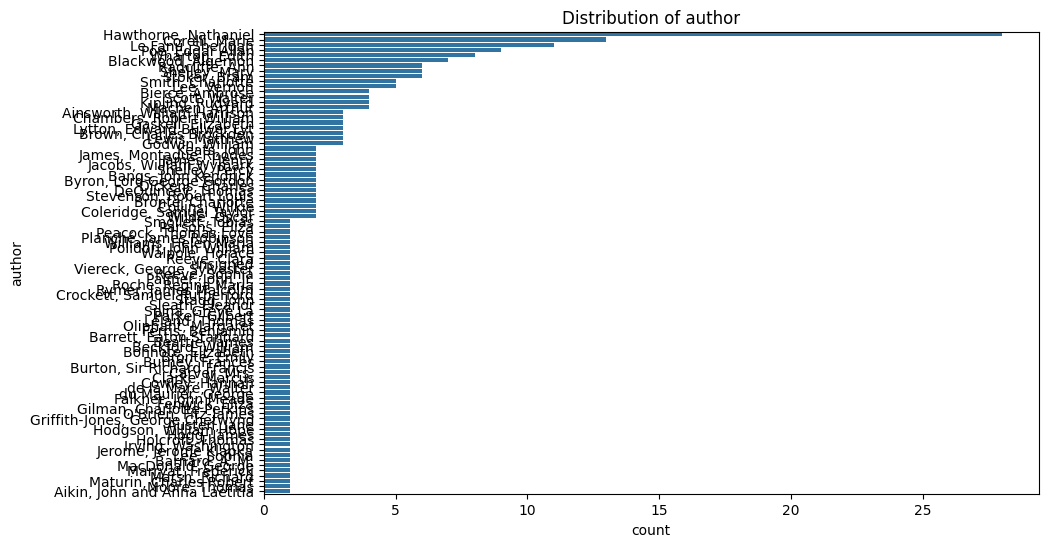

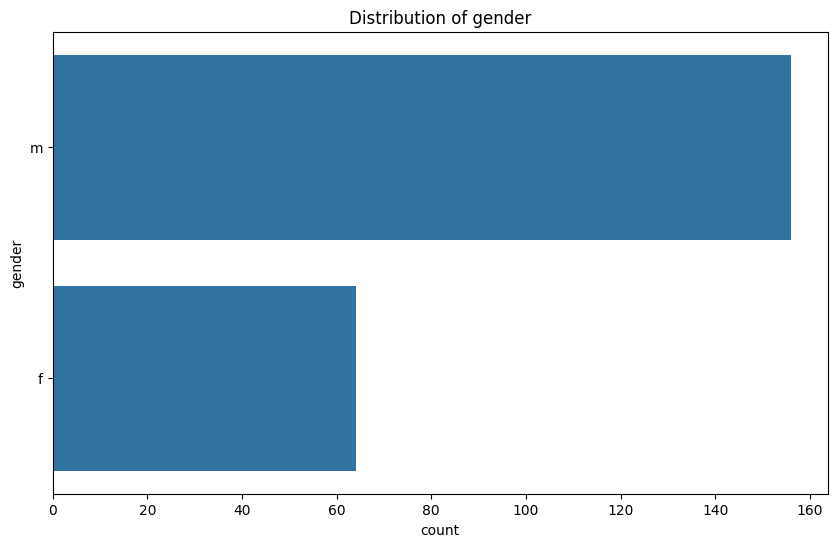

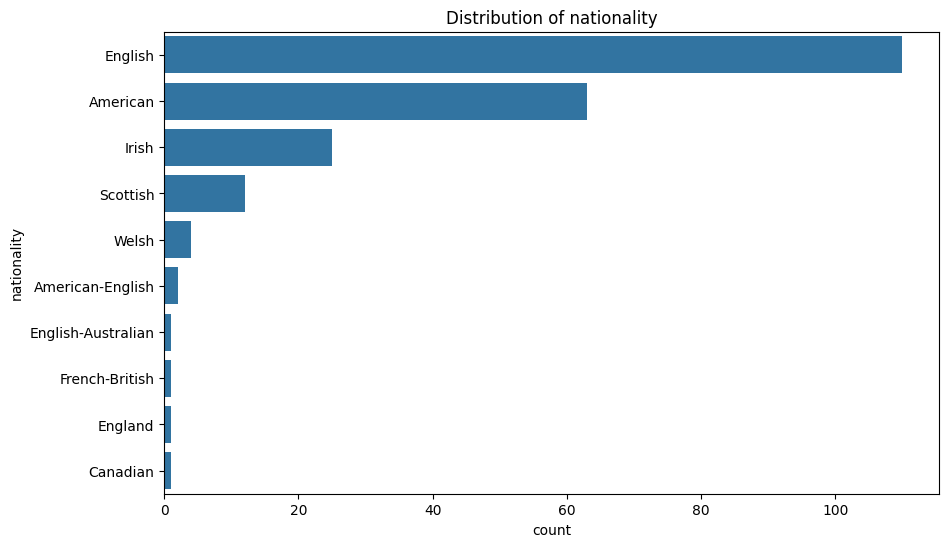

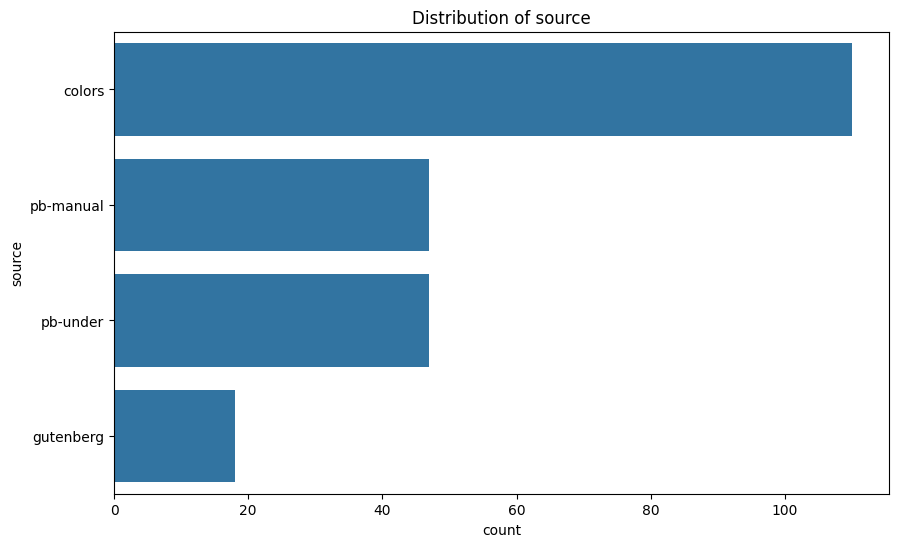

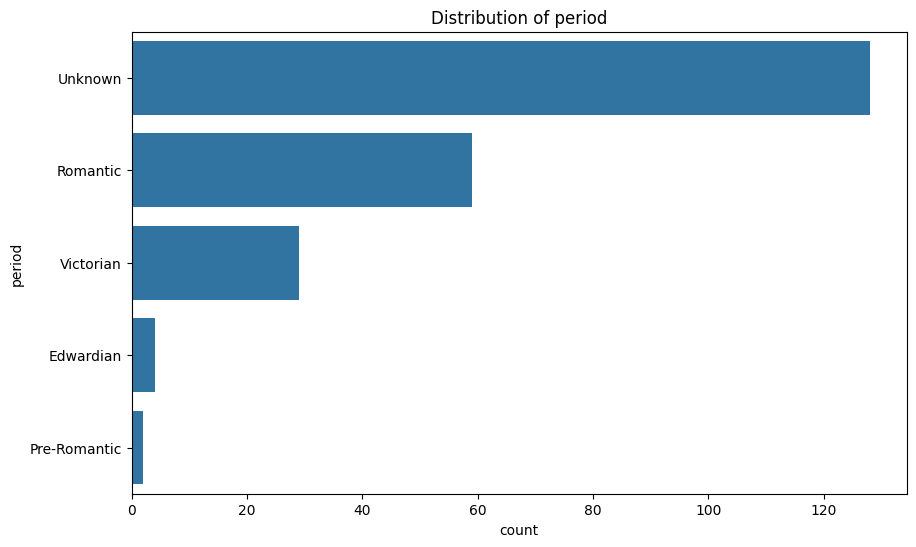

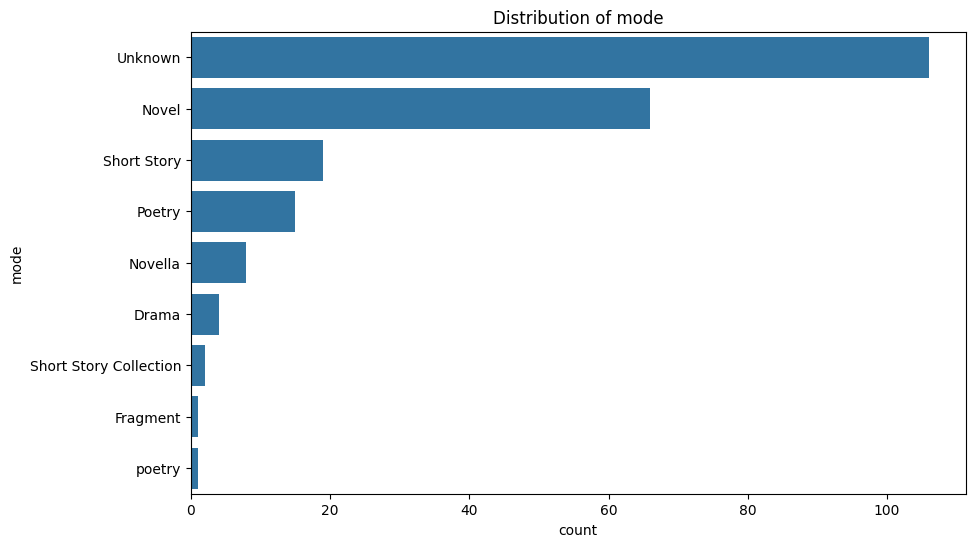

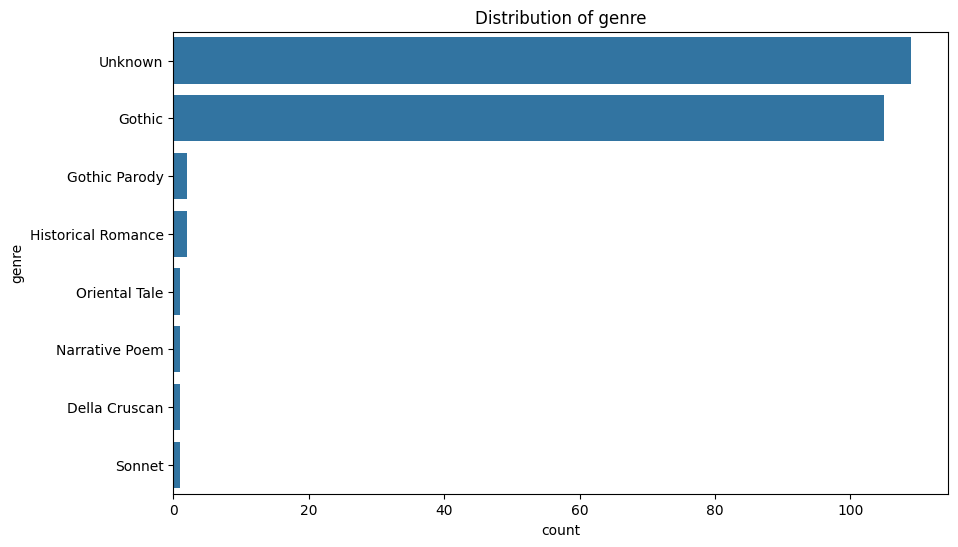

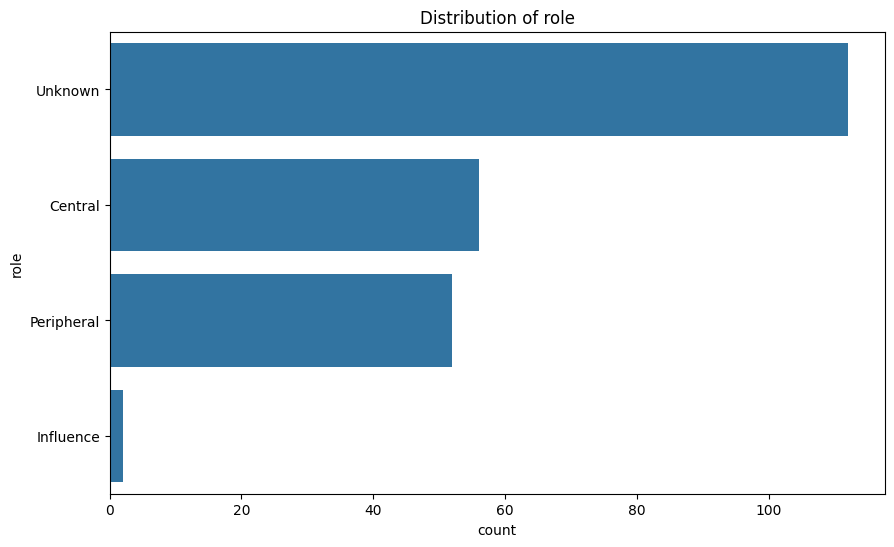

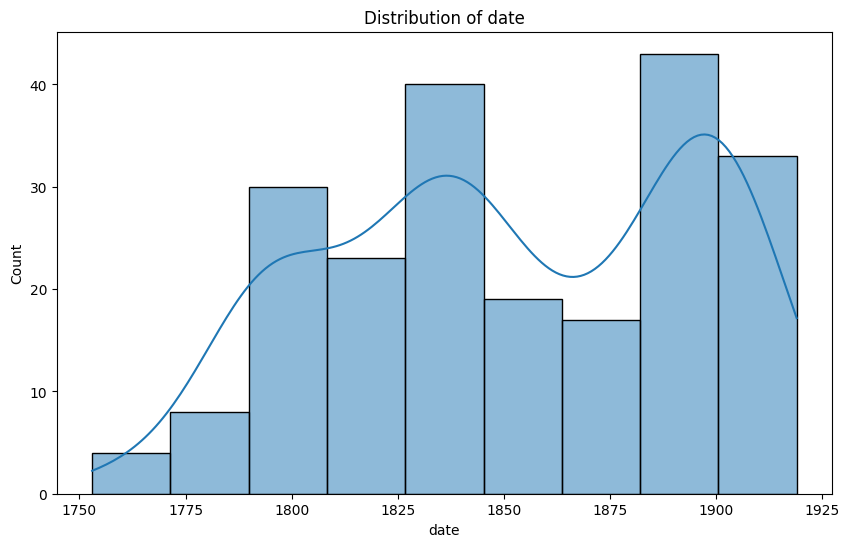

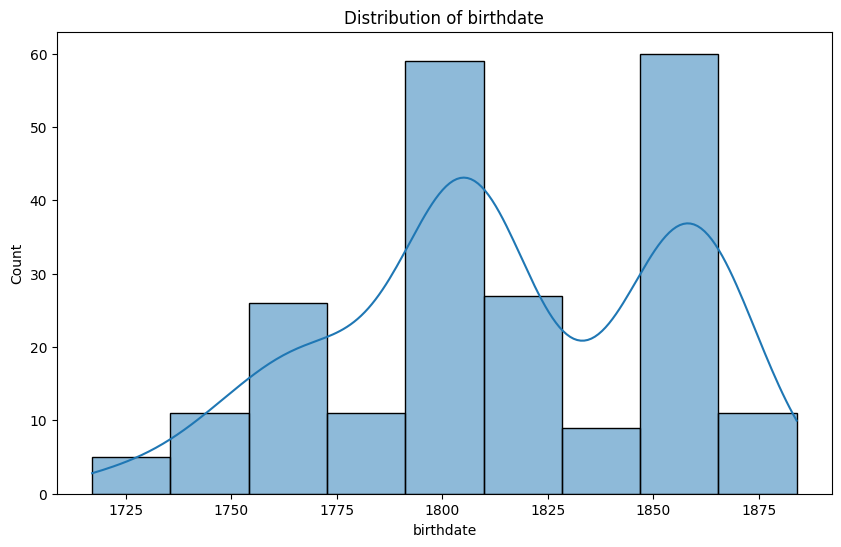

In [33]:
# Categorical features
categorical_features = ['title', 'author', 'gender', 'nationality', 'source', 'period', 'mode', 'genre', 'role']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    # Ordering the categories by frequency
    order = df_feat[feature].value_counts().index
    sns.countplot(y=feature, data=df_feat, order=order)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Numerical features
numerical_features = ['date', 'birthdate']
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_feat[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

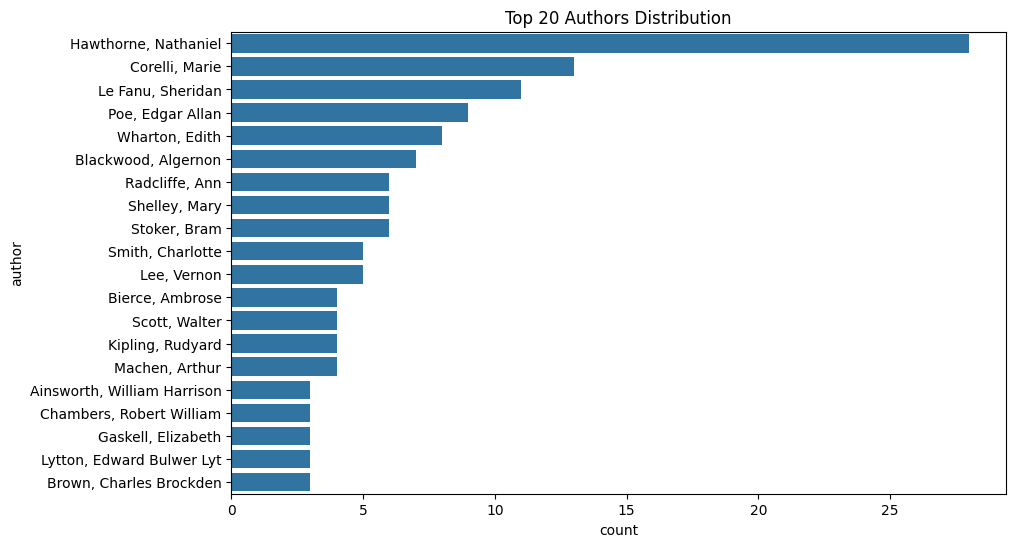

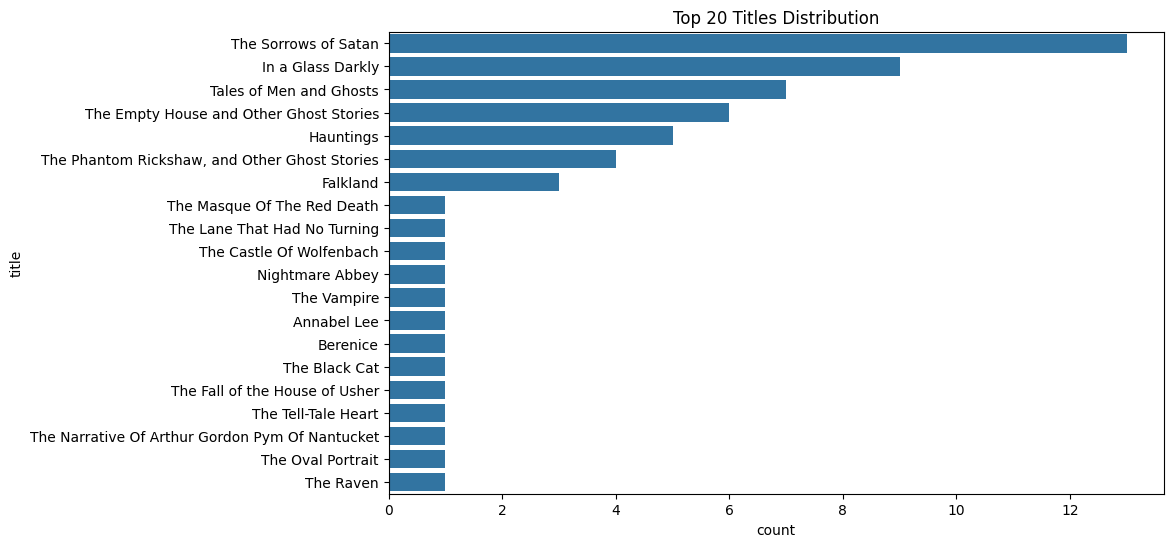

In [38]:
# Adjusting distributions for 'name' and 'title' - focusing on the upper end and bending part of the distribution
# First, find the most common values in 'author' and 'title'
top_authors = df_feat['author'].value_counts().nlargest(20).index
top_titles = df_feat['title'].value_counts().nlargest(20).index

# Plotting distributions for 'author'
plt.figure(figsize=(10, 6))
author_order = df_feat['author'].value_counts().iloc[:20].index
sns.countplot(y='author', data=df_feat, order=author_order)
plt.title('Top 20 Authors Distribution')
plt.show()

# Plotting distributions for 'title'
plt.figure(figsize=(10, 6))
title_order = df_feat['title'].value_counts().iloc[:20].index
sns.countplot(y='title', data=df_feat, order=title_order)
plt.title('Top 20 Titles Distribution')
plt.show()

#### Topic trends over time

In [48]:
df_time = df_txt_features_LDA.copy()

In [47]:
topic_columns = [col for col in df_time.columns if col.startswith('Topic')]

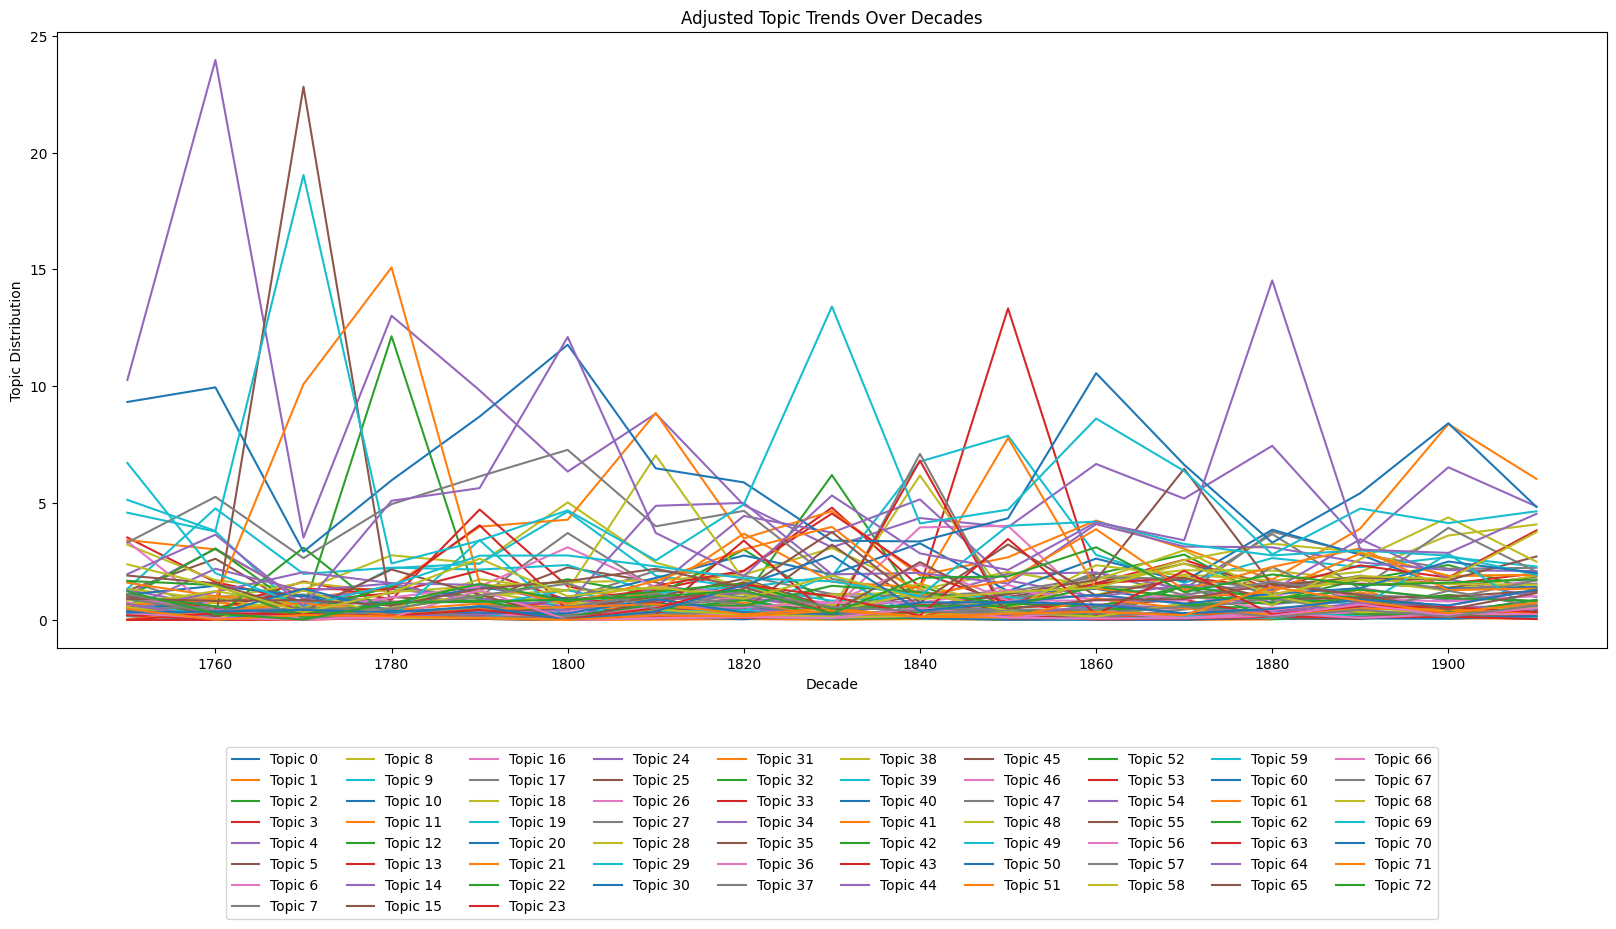

In [49]:
# Function to convert year to decade
def year_to_decade(year):
    return (year // 10) * 10

# Applying the function to create a 'decade' column
df_time['decade'] = df_time['date'].apply(year_to_decade)

# Grouping by 'decade' and calculating the mean for topic distributions
decade_grouped = df_time.groupby('decade')[topic_columns].mean()

plt.figure(figsize=(20, 8))  # Keeping the graph broad
for topic in topic_columns:
    plt.plot(decade_grouped.index, decade_grouped[topic], label=topic)

plt.xlabel('Decade')
plt.ylabel('Topic Distribution')
plt.title('Adjusted Topic Trends Over Decades')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=10)  # Spreading out the legend further with fewer rows
plt.show()

Those topics that surpass a certain threshhold of importance through out their life cycle.
- Filtering for maximal weight through out their lifetime.

In [50]:
# Group 1: Topics that never rise beyond a consistent level
consistent_topics = [topic for topic in topic_columns if decade_grouped[topic].max() <= 8]

# Group 2: Topics that fluctuate
peaking_topics = [topic for topic in topic_columns if decade_grouped[topic].max() > 8]

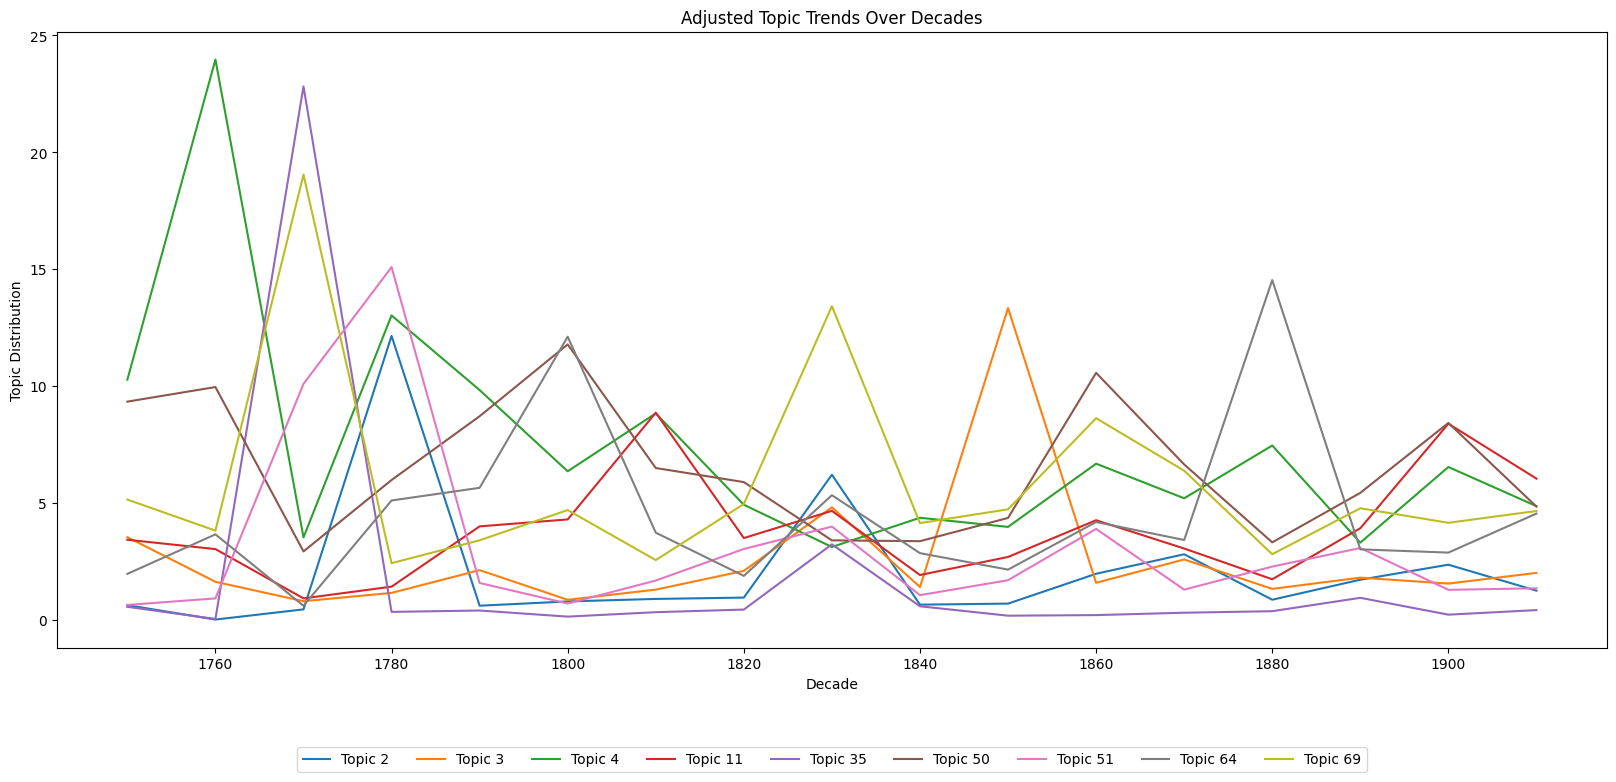

In [51]:
plt.figure(figsize=(20, 8))  # Keeping the graph broad
for topic in peaking_topics:
    plt.plot(decade_grouped.index, decade_grouped[topic], label=topic)

plt.xlabel('Decade')
plt.ylabel('Topic Distribution')
plt.title('Adjusted Topic Trends Over Decades')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=10)  # Spreading out the legend further with fewer rows
plt.show()

Those topics that surpass a certain threshhold of fluctuation and carry a standard deviation higher than the 75th percentile across all topics, indicating that they do not maintain consistent values and vary significantly over the decades.

In [52]:
# Calculating the standard deviation for each topic to measure fluctuations
topic_fluctuations = decade_grouped.std()

# Setting a threshold for identifying strong fluctuations
# This can be adjusted based on the desired level of fluctuation
percentile_threshold = np.percentile(topic_fluctuations, 90)

# Topics with fluctuations above the threshold
fluctuating_topics = topic_fluctuations[topic_fluctuations > percentile_threshold].index.tolist()

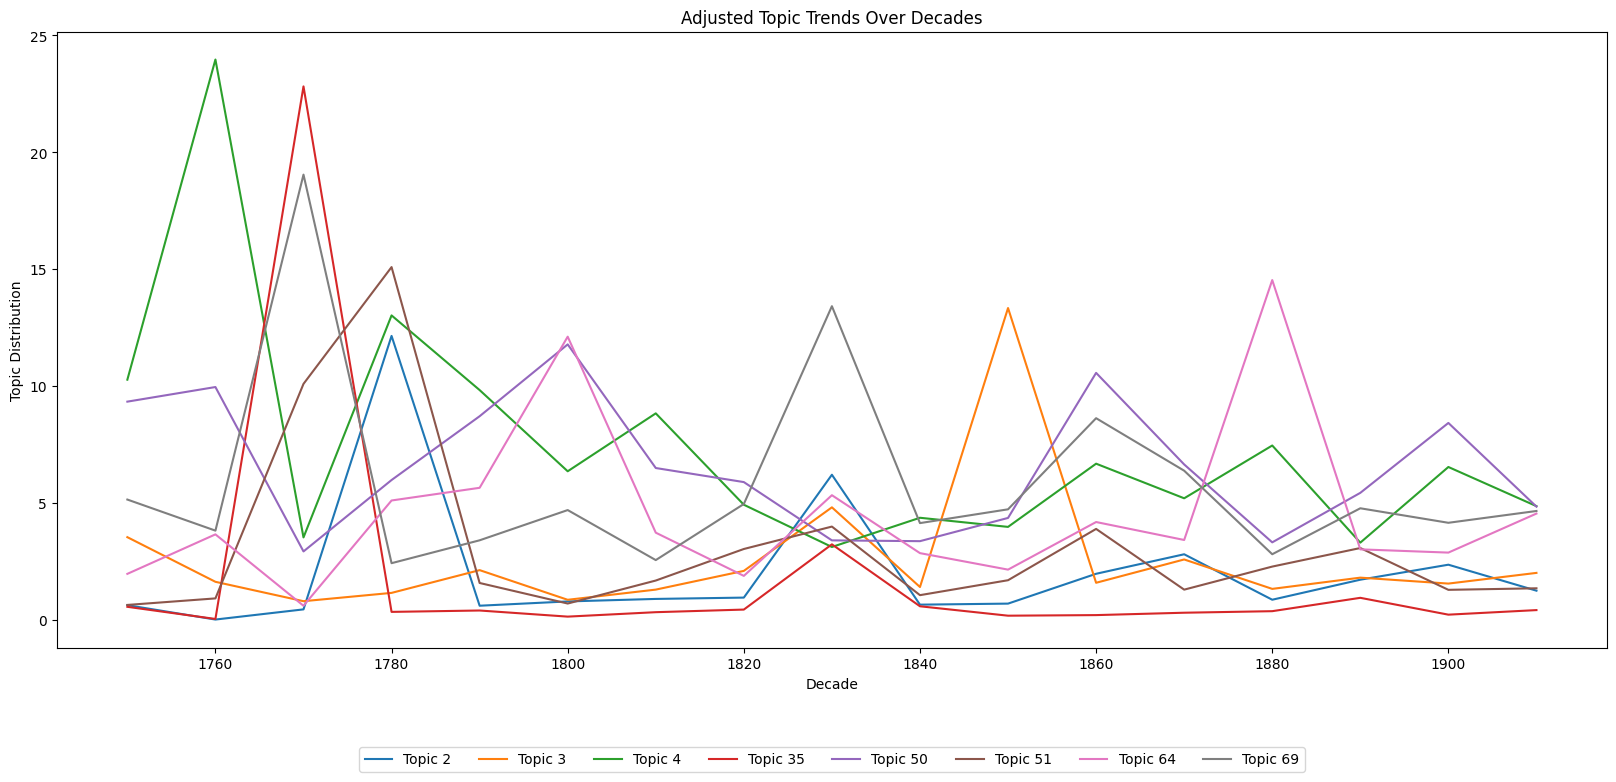

In [53]:
plt.figure(figsize=(20, 8))  # Keeping the graph broad
for topic in fluctuating_topics:
    plt.plot(decade_grouped.index, decade_grouped[topic], label=topic)

plt.xlabel('Decade')
plt.ylabel('Topic Distribution')
plt.title('Adjusted Topic Trends Over Decades')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=10)  # Spreading out the legend further with fewer rows
plt.show()

In [54]:
df = df_txt_features_LDA.copy()

app = dash.Dash(__name__)

# Function to convert year to decade for grouping
def year_to_decade(year):
    return (year // 10) * 10

# Applying the function to create a 'decade' column
df['decade'] = df['date'].apply(year_to_decade)

# Extracting topic columns
topic_columns = [col for col in df.columns if col.startswith('Topic')]

# Grouping by 'decade' and calculating the mean for topic distributions
decade_grouped = df.groupby('decade')[topic_columns].mean()

# Calculating the standard deviation for each topic to measure fluctuations
topic_fluctuations = decade_grouped.std()

# Function to filter topics based on a fluctuation percentile threshold
def filter_topics_by_percentile(threshold_percentile):
    percentile_threshold = np.percentile(topic_fluctuations, threshold_percentile)
    return topic_fluctuations[topic_fluctuations > percentile_threshold].index.tolist()

# Function to update the figure based on selected topics
def create_figure(selected_topics):
    fig = go.Figure()
    for topic in selected_topics:
        fig.add_trace(go.Scatter(x=decade_grouped.index, y=decade_grouped[topic],
                                 mode='lines', name=topic))
    fig.update_layout(legend_orientation="h", legend=dict(x=0, y=1.1, xanchor='left'))
    return fig


# Function to update the figure based on selected topics
def create_figure(selected_topics):
    fig = go.Figure()
    for topic in selected_topics:
        fig.add_trace(go.Scatter(x=decade_grouped.index, y=decade_grouped[topic],
                                 mode='lines', name=topic))
    fig.update_layout(legend_orientation="h", legend=dict(x=0, y=1.1, xanchor='left'))
    return fig

# Create slider
slider = dcc.Slider(
    id='percentile-slider',
    min=0,
    max=100,
    value=90,
    marks={i: f'{i}%' for i in range(0, 101, 25)},
    step=1
)

# Create dropdown (initially empty)
dropdown = dcc.Dropdown(
    id='topic-dropdown',
    options=[],
    value=[],
    multi=True
)

# App layout
app.layout = html.Div([
    html.Div([slider]),
    html.Div([dropdown]),
    dcc.Graph(id='topic-graph')
])


# Callback for updating the dropdown options and selected values based on slider value
@app.callback(
    [Output('topic-dropdown', 'options'),
     Output('topic-dropdown', 'value')],
    [Input('percentile-slider', 'value')]
)
def update_dropdown_options(percentile_value):
    filtered_topics = filter_topics_by_percentile(percentile_value)
    options = [{'label': topic, 'value': topic} for topic in filtered_topics]
    return options, [option['value'] for option in options]

# Callback for updating the graph based on selected topics and percentile
@app.callback(
    Output('topic-graph', 'figure'),
    [Input('topic-dropdown', 'value'),
     Input('percentile-slider', 'value')]
)
def update_graph(selected_topics, percentile_value):
    return create_figure(selected_topics)

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

#### Author-Specific Topic Analysis:

#take the 20 most prevalent authors as well as authors who have a text marked as central (or optionally are explicitly marked as gothic or are on a list) and aggregate them

later on take all texts marked as central as well as (insert essential texts) and display their topic distribution.

stacked bar charts or grouped bar charts. to visualize the contribution of a given author to a topic 

#### Gender-Based Analysis

#### Nationality-Based Analysis

Dataframe consisting of a document topic distribution with each document being one 1000-word segment of a book and the features about the texts covering the following attributes: 'title', 'author', 'date','gender', 'birthdate', 'nationality', 'source', 'polarity' always being given, as well as the following only filled for about 1/4 of the texts 'period', 'mode', 'genre',  'role (central/peripheral/influence)' and 'polarity', 

Topic Trends Over Time:

Create time-series plots to show how certain topics evolve over time. This can be done by averaging topic distributions for segments from the same year or time period.

Author-Specific Topic Analysis:

Analyze how topics are distributed across different works of the same author or compare topic distributions among authors. This can be visualized using stacked bar charts or grouped bar charts.

Gender-Based Analysis:

Compare the prevalence of topics between segments written by authors of different genders. This can reveal if certain topics are more associated with male or female authors.

Nationality and Literary Movement:

Investigate if there are patterns in topic distributions based on the author's nationality or associated literary periods ('period' column). This might require grouping the data by these attributes and then visualizing the average topic distributions for each group.

Clustering Analysis:

Use clustering techniques (like K-means or hierarchical clustering) on the topic distributions to group similar text segments. This can be visualized in a scatter plot using a dimensionality reduction technique (like PCA or t-SNE).

Correlation Heatmaps:

Create heatmaps to visualize the correlation between different topics and textual features. This can help identify which topics are strongly associated with specific attributes like genre, period, or author attributes.

Sentiment Analysis:

Analyse how sentiments correlate with different topics and attributes.

Network Analysis:

how a certain closeness in the distribution of topics can be interpreted as a literary influence  unilateraly through out time.

#### CTM

In [36]:
prepared_data = pyLDAvis.prepare(topic_term_dists_ETM, doc_topic_dists_ETM, doc_lengths, vocab, term_frequency)

# Display the visualization
pyLDAvis.display(prepared_data)

#### ETM

In [1]:
prepared_data = pyLDAvis.prepare(topic_term_dists_ETM, doc_topic_dists_ETM, doc_lengths, vocab, term_frequency)

# Display the visualization
pyLDAvis.display(prepared_data)

NameError: name 'pyLDAvis' is not defined